In [73]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [28]:
# load fashion dataset (included in keras) -- 60.000 images for training and 10.000 for validation/testing

fashion_mnist = keras.datasets.fashion_mnist # loading the dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # spliting into testing and training

In [29]:
train_images.shape # showing the data shape (60.000 images, made up of 28x28 pixels)

(60000, 28, 28)

In [30]:
train_images[0,23,23] # looking at just 1 pixel (between 0-255 grayscale)

194

In [31]:
# types of clothing of the dataset (we do not specify, it's already given in the dataset details we just implement them here)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_labels[:10] # showing 10 first

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

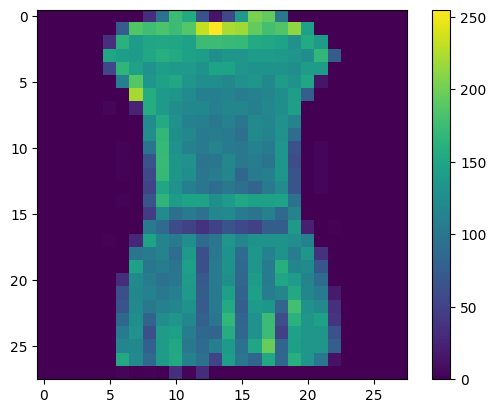

In [32]:
# using matplot lib just to show how the images look like
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
#plt.grid(False)
plt.show()

In [33]:
# DATA PREPROCESSING 
# In this case we will simply scale all of our greyscale pixels values (0-255) to be between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

In [34]:
# BUILDING THE MODEL
# We are using keras sequential model with three different layers. This model represents a feed-forward neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     # input layer (1)
    keras.layers.Dense(128, activation='relu'),     # hidden layer (2)
    keras.layers.Dense(10, activation='softmax')    # output layer (3) 
])

# LAYER 1: Input layer consisting in 784 neurons. The Flatten means we will reshape the array(28,28) into a vector 784 neurons
# and each pixel will b e associate with one neuron

# LAYER 2: Only hidden layer. The Dense denotes that layer will be fully connected and each neuron from the previous one.
# It has 128 neurons and usese the rectify linear unit activation function

# LAYER 3: It has 10 neurons that we will look at to determine or model output. Each neuron represents the probabillity of a 
# given image being one of the 10 different classes. The activation function softmax is used to do the calculations

c:\Users\igorm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# COMPILING THE MODEL
# Here we define the loss function, optimizer and metrics we would track

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# TRAINING THE MODEL

model.fit(train_images, train_labels, epochs=10, batch_size=1) # passing data, labels, epochs and batches

Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - accuracy: 0.8312 - loss: 0.4921
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - accuracy: 0.8636 - loss: 0.3921
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 59s 982us/step - accuracy: 0.8663 - loss: 0.3820
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 58s 972us/step - accuracy: 0.8715 - loss: 0.3754
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - accuracy: 0.8768 - loss: 0.3634
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 58s 970us/step - accuracy: 0.8826 - loss: 0.3591
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - accuracy: 0.8820 - loss: 0.3571
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - accuracy: 0.8806 - loss: 0.3565
Epoch 9/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 62s 1ms/step - accuracy: 0.8821 - loss: 0.3542
Epoch 10/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - accuracy: 0.8856 - loss: 0.3493


In [ ]:
# EVALUATING THE MODEL
# built in method from keras. The verbose 0 = silent, 1 = progress bar (keras documentation)
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=1, verbose=1)
print('Test accuracy: ', test_acc)

#The accuracy is lower than training model. This difference is reffered to as overfitting.

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 469us/step - accuracy: 0.8642 - loss: 0.5394
Test accuracy:  0.8611000180244446


In [ ]:
# MAKING PREDICTIONS 
# just another keras method

predictions = model.predict(test_images, batch_size=1) # the method return an array of predictions for each image

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 451us/step


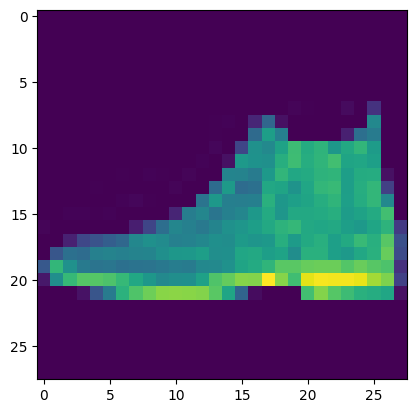

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.1564121e-05 0.0000000e+00 3.0232265e-03 6.6525921e-23 9.9695528e-01]
9 = Ankle boot


In [57]:
plt.figure()
plt.imshow(test_images[0])
plt.show()

print(predictions[0])
print(np.argmax(predictions[0]), '=', class_names[np.argmax(predictions[0])])

Image number: 4


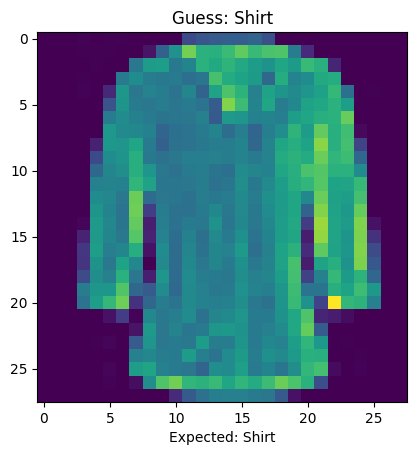

ValueError: invalid literal for int() with base 10: ''

In [97]:
def show_image(n):
    print("Image number:", n)
    pred_class_num = np.argmax(predictions[n])
    guess = class_names[pred_class_num]
    label = class_names[test_labels[n]]
    plt.figure()
    plt.imshow(test_images[n])
    plt.title("Guess: " + guess)
    plt.xlabel("Expected: " + label)
    plt.show()

index = 0

while True:
    n = input("Pick a number: ")
    n = int(n)
    if index > 0:
        clear_output(wait=False)
    show_image(n)
    index = index + 1